# Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import shutil
import cv2
from PIL import ImageOps, Image
import PIL.Image as pil_image

import numpy as np
import nibabel as nib
import pydicom
import SimpleITK as sitk
from skimage.transform import resize

In [31]:
def json_to_dict(p):
    dti = dict()
    path = p.split("/")
    modality = path[-1].replace(".png", "").split("_")[-1]
    dti["Subject"] = path[0]
    dti["Session"] = path[1]
    dti["mod"] = path[2]
    dti["File"] = path[3]
    dti["Type"] = modality
    dti["Path"] = p
    json_file = p.replace(".png", ".json").replace(".nii.gz", ".json")
    if os.path.exists(json_file):
        with open(json_file) as f:
            dtij = json.load(f)
        for l in dtij.keys():
            if "Value" in dtij[l].keys():
                try:
                    dti[pydicom.datadict.dictionary_description(str(l))] = dtij[l][
                        "Value"
                    ]
                except:
                    dti[str(l)] = dtij[l]["Value"]
    else:
        print(p)
    return dti


def get_image(img_path, dti):
    img = sitk_img = sitk.ReadImage(img_path)
    img = sitk.GetArrayFromImage(sitk_img)
    if dti["Photometric Interpretation"][0] == "MONOCHROME1":
        img = -img
    imgl = min(img.shape[0], img.shape[1])
    imgl = int((imgl - imgl % 2) / 2)
    imgc = img[
        int(img.shape[0] / 2 - imgl) : int(img.shape[0] / 2 + imgl),
        int(img.shape[1] / 2 - imgl) : int(img.shape[1] / 2 + imgl),
    ]
    imgc = (
        1.0
        * (imgc - np.min(np.ravel(imgc)))
        / (np.max(np.ravel(imgc)) - np.min(np.ravel(imgc)))
    )
    test = (
        (
            (imgc[:, :] - np.min(np.ravel(imgc)))
            / (np.max(np.ravel(imgc)) - np.min(np.ravel(imgc)))
        )
        * (2 ** 16 - 1)
    ).astype(np.uint16)
    return test

In [44]:
len(glob.glob("bimcv_covid19_posi_subjects_*/*/*/*/*.png"))

499

In [27]:
positive_covid = glob.glob("bimcv_covid19_posi_subjects_*/*/*/*/*.png")
dest_path = "./data_valencia/covid/"

for file in positive_covid:
    file_name = os.path.basename(file)
    dti = json_to_dict(file)
    if 'Modality' in dti.keys():
        if dti['Modality'][0] == 'DX' or dti['Modality'][0] == 'CR':
            try:
                img = get_image(file, dti)
                img = pil_image.fromarray(img / 255)
                img = img.convert("L")
                img = img.resize((224, 224))
                img = ImageOps.grayscale(img)
                img.save(os.path.join(dest_path, file_name))
            except:
                continue

bimcv_covid19_posi_subjects_2/sub-S03092/ses-E07943/mod-rx/sub-S03092_ses-E07943_acq-1_run-1_bp-chest_cr.png
bimcv_covid19_posi_subjects_2/sub-S03111/ses-E06818/mod-rx/sub-S03111_ses-E06818_acq-1_run-1_bp-chest_vp-ll_dx.png
bimcv_covid19_posi_subjects_2/sub-S03088/ses-E06603/mod-rx/sub-S03088_ses-E06603_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_posi_subjects_2/sub-S03107/ses-E06897/mod-rx/sub-S03107_ses-E06897_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_posi_subjects_2/sub-S03110/ses-E07026/mod-rx/sub-S03110_ses-E07026_acq-1_run-1_bp-chest_vp-ll_dx.png
bimcv_covid19_posi_subjects_2/sub-S03106/ses-E06431/mod-rx/sub-S03106_ses-E06431_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_posi_subjects_2/sub-S03106/ses-E06683/mod-rx/sub-S03106_ses-E06683_acq-1_run-1_bp-chest_vp-ll_dx.png
bimcv_covid19_posi_subjects_2/sub-S03090/ses-E06889/mod-rx/sub-S03090_ses-E06889_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_posi_subjects_2/sub-S03100/ses-E06605/mod-rx/sub-S03100_ses-E06605_acq-1

In [46]:
positive_covid = glob.glob("bimcv_covid19_neg_subjects_*/*/*/*/*.png")
dest_path = "./data_valencia/noncovid/"

for file in positive_covid:
    file_name = os.path.basename(file)
    dti = json_to_dict(file)
    if 'Modality' in dti.keys():
        if dti['Modality'][0] == 'DX' or dti['Modality'][0] == 'CR':
            try:
                img = get_image(file, dti)
                img = pil_image.fromarray(img / 255)
                img = img.convert("L")
                img = img.resize((224, 224))
                img = ImageOps.grayscale(img)
                img.save(os.path.join(dest_path, file_name))
            except:
                continue

bimcv_covid19_neg_subjects_11/sub-S04680/ses-E14001/mod-rx/sub-S04680_ses-E14001_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_neg_subjects_11/sub-S04681/ses-E09168/mod-rx/sub-S04681_ses-E09168_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_neg_subjects_11/sub-S04678/ses-E09165/mod-rx/sub-S04678_ses-E09165_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_neg_subjects_8/sub-S04635/ses-E11257/mod-rx/sub-S04635_ses-E11257_acq-1_run-1_bp-chest_vp-pa_dx.png
bimcv_covid19_neg_subjects_8/sub-S04628/ses-E09099/mod-rx/sub-S04628_ses-E09099_acq-1_run-1_bp-chest_dx.png
bimcv_covid19_neg_subjects_8/sub-S04628/ses-E09099/mod-rx/sub-S04628_ses-E09099_acq-4_run-1_bp-chest_dx.png
bimcv_covid19_neg_subjects_8/sub-S04628/ses-E09099/mod-rx/sub-S04628_ses-E09099_acq-2_run-1_bp-chest_dx.png
bimcv_covid19_neg_subjects_8/sub-S04628/ses-E09099/mod-rx/sub-S04628_ses-E09099_acq-3_run-1_bp-chest_dx.png
bimcv_covid19_neg_subjects_8/sub-S04628/ses-E09099/mod-rx/sub-S04628_ses-E09099_acq-5_run-1_bp-chest_dx.png
b

In [45]:
len(glob.glob("bimcv_covid19_neg_subjects_*/*/*/*/*.png"))

507

In [47]:
img.shape

(1140, 1387)

In [93]:
import cv2
img = cv2.imread('./testingbimcv/sub-S03086_ses-E06232_run-1_bp-chest_vp-ap_cr.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

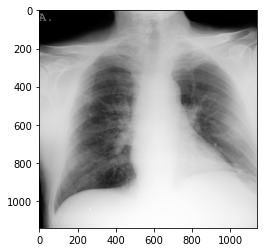

In [49]:
plt.imshow(test, cmap='gray')

In [83]:
import PIL.Image as pil_image
import io
import numpy as np
path='./testingbimcv/sub-S03088_ses-E06182_run-1_bp-chest_vp-ap_dx.png'
save_path='./teste.png'
with open(path, 'rb') as f:
    tif = pil_image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = pil_image.fromarray(normalized)
im.save(save_path) 

OSError: cannot write mode F as PNG